# Reinforcement Learning: An Introduction 2nd Edition - Example 6.5

Environment: [Example 6.5: Windy Gridworld](http://incompleteideas.net/book/bookdraft2017nov5.pdf#page=124)

## Environment Settings

I use same settings of the environment.

Observation:
* $7 \times 10$ grid
* 3 to 5, 8 columns - upward wind power 1
* 6 to 7 columns - upward wind power 2

Actions:
* up  
* down  
* left  
* right  

Hyperparameters:
* $\epsilon = 0.1$  
* $\alpha = 0.5$  
* $\gamma = 1$  
* 8000 episodes

Numpy Random Seed: 0

## Source Codes

### Library

RL agent:
* [Sarsa](../rl/rl_agent/sarsa.py)

Environment:
* [Windy Gridworld](../rl/environment/windy_gridworld.py)

### Import modules

In [1]:
import sys
import os
sys.path.append(os.pardir)

import rl
from rl.environment import WindyGridworld
import numpy as np
import matplotlib.pyplot as plt

rl.util.seed(0)

### Define test function

In [2]:
def test_env(env: WindyGridworld, sarsa: rl.Sarsa):
    shape_x, shape_y = env.obs_shape
    
    start_state = env.reset()
    goal_state = env.goal_state
    current_state = start_state
    
    trace_states = [current_state]
    total_rewards = 0
    
    # start an episode
    for i in range(1000):
        current_action = sarsa.get_action(current_state)
        next_state, reward, terminated = env.step(current_action)
        trace_states.append(next_state)
        total_rewards += reward
        
        if terminated:
            break
        
        current_state = next_state
        
    print(f"total rewards: {total_rewards}")
    
    trace_states = np.array(trace_states)
    
    # draw grid world
    plt.plot(trace_states[:,1], trace_states[:,0], linestyle="--", label="Sarsa Path")
    plt.scatter(start_state[1], start_state[0], c="red", marker="x", label="Start")
    plt.scatter(goal_state[1], goal_state[0], c="black", marker="x", label="Goal")
    plt.axis([-1, shape_y, -1, shape_x])
    plt.xticks(range(-1, shape_y + 1))
    plt.yticks(range(-1, shape_x + 1))
    plt.grid()
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

### Create Windy Gridworld

In [3]:
env = WindyGridworld()

### Instantiate RL agent

In [4]:
# hyperparameters
alpha = 0.5
gamma = 1
epsilon = 0.1

sarsa = rl.Sarsa(
    env.obs_shape,
    env.action_count,
    terminal_states=[tuple(env.goal_state)],
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon
)

### Test the environment

obs shape: (7, 10), start state: [3 0], goal state: [3 7]
total rewards: -1000


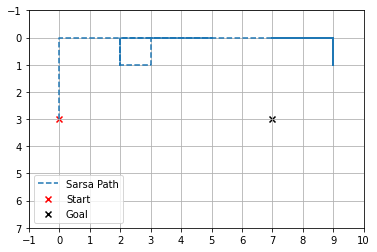

In [5]:
print(f"obs shape: {env.obs_shape}, start state: {env.state}, goal state: {env.goal_state}")
test_env(env, sarsa)

### Training

total rewards: -1000


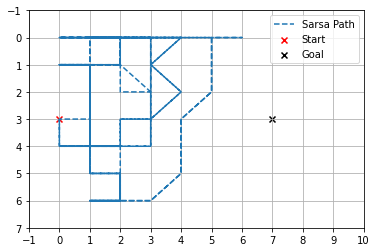

total rewards: -20


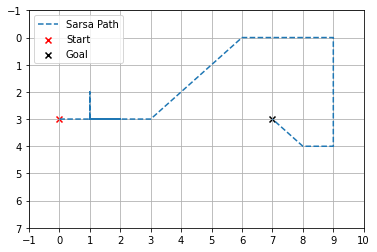

total rewards: -14


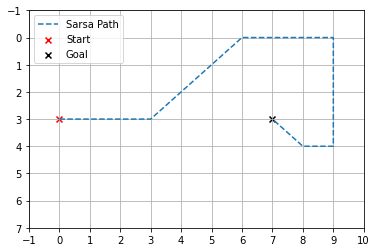

average rewards of last 100 rewards


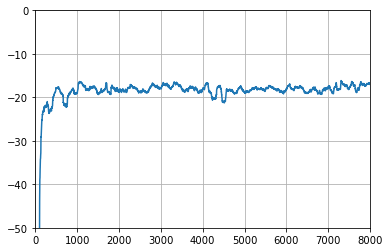

In [6]:
episodes_count = 8000
rewards_arr = []

for episode in range(episodes_count):
    current_state = env.reset()
    sarsa.start_episode()
    terminated = False
    total_rewards = 0
    
    # start an episode
    while not terminated:
        current_action = sarsa.get_action(current_state)
        # take action a; observe r, s'
        next_state, reward, terminated = env.step(current_action)
        transition = rl.Transition(
            current_state,
            current_action,
            next_state,
            reward,
            terminated
        )
        # update q-values
        sarsa.update(transition)
        
        current_state = next_state
        total_rewards += reward
        
    sarsa.end_episode()
    rewards_arr.append(total_rewards)
    
    # test the environment
    if episode % 4000 == 0:
        test_env(env, sarsa)

# greedy policy for the test
sarsa.epsilon = 0
test_env(env, sarsa)
    
print("average rewards of last 100 rewards")
plt.plot(rl.util.average_last_data(rewards_arr, data_count=100))
plt.grid()
plt.axis([0, 8000, -50, 0])
plt.show()